In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
cor(iris[1:4]) #독립변수들의 상관계수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [4]:
#다중공선성 - 독립변수들 간에 강한 상관관계가 나타나는 현상
#로그변환(데이터표준화)
log.ir<-log(iris[,1:4])
# head(iris[,1:4])
# head(log.ir)
ir.species<-iris[,5] #종속변수 추가
ir.species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [5]:
#주성분분석 함수 center=T 중앙값을 0 으로, scale.=T 분산을 1로 설정
(ir.pca<-prcomp(log.ir,center=T,scale.=T))

Standard deviations (1, .., p=4):
[1] 1.7124583 0.9523797 0.3647029 0.1656840

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3         PC4
Sepal.Length  0.5038236 -0.45499872  0.7088547  0.19147575
Sepal.Width  -0.3023682 -0.88914419 -0.3311628 -0.09125405
Petal.Length  0.5767881 -0.03378802 -0.2192793 -0.78618732
Petal.Width   0.5674952 -0.03545628 -0.5829003  0.58044745

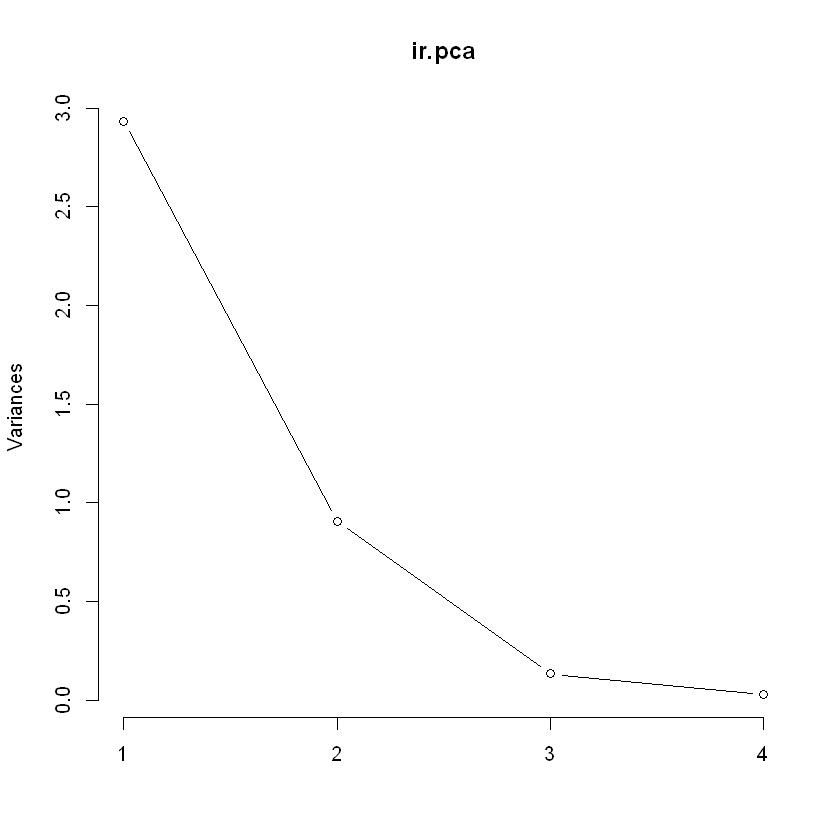

In [6]:
plot(ir.pca,type='l') #엘보우 포인트 확인(기울기가 크게 꺾이는 포인트)

In [7]:
# Proportion of Variance, Cumulative Proportion 확인
summary(ir.pca) 

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7125 0.9524 0.36470 0.16568
Proportion of Variance 0.7331 0.2268 0.03325 0.00686
Cumulative Proportion  0.7331 0.9599 0.99314 1.00000

In [8]:
ir.pca$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5038236,-0.45499872,0.7088547,0.19147575
Sepal.Width,-0.3023682,-0.88914419,-0.3311628,-0.09125405
Petal.Length,0.5767881,-0.03378802,-0.2192793,-0.78618732
Petal.Width,0.5674952,-0.03545628,-0.5829003,0.58044745


In [9]:
# 회귀분석을 하기 위한 변환 작업, %*% 행렬 곱셈
PRC<-as.matrix(log.ir) %*% ir.pca$rotation
head(PRC)

PC1,PC2,PC3,PC4
-0.2772209,-1.809493,1.604387,-1.0010840
-0.2507663,-1.654229,1.627078,-0.9946772
-0.3340210,-1.690148,1.592416,-0.9502831
-0.2527176,-1.656968,1.556306,-1.0640079
-0.2957159,-1.825531,1.581020,-1.0074464
0.2242011,-1.962854,1.162457,-0.7503219


In [10]:
train1<-cbind(ir.species, as.data.frame(PRC)) #종속변수를 합침
head(train1)
#첫번째 변수를 숫자형이 아닌 팩터형으로 벼환
train1[,1]<-as.factor(train1[,1])
colnames(train1)[1]<-'label' #필드명 추가
head(train1)

ir.species,PC1,PC2,PC3,PC4
setosa,-0.2772209,-1.809493,1.604387,-1.0010840
setosa,-0.2507663,-1.654229,1.627078,-0.9946772
setosa,-0.3340210,-1.690148,1.592416,-0.9502831
setosa,-0.2527176,-1.656968,1.556306,-1.0640079
setosa,-0.2957159,-1.825531,1.581020,-1.0074464
setosa,0.2242011,-1.962854,1.162457,-0.7503219


label,PC1,PC2,PC3,PC4
setosa,-0.2772209,-1.809493,1.604387,-1.0010840
setosa,-0.2507663,-1.654229,1.627078,-0.9946772
setosa,-0.3340210,-1.690148,1.592416,-0.9502831
setosa,-0.2527176,-1.656968,1.556306,-1.0640079
setosa,-0.2957159,-1.825531,1.581020,-1.0074464
setosa,0.2242011,-1.962854,1.162457,-0.7503219


In [15]:
#회귀분석 모형: 종속변수 ~ 독립변수
fit1<-lm(label~PC1+PC2, data=train1) 
fit1_pred<-predict(fit1,newdata=train1) #예측값 확인
fit1_pred

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"

1         2         3         4         5         6         7         8 
0.9177087 0.8984698 0.8436802 0.8976691 0.9075902 1.3418786 1.0463684 0.9390723 
        9        10        11        12        13        14        15        16 
0.8445396 0.6210744 0.9772913 0.9476893 0.5797361 0.4155148 0.9120119 1.3118574 
       17        18        19        20        21        22        23        24 
1.2207336 1.0980907 1.2412319 1.1287785 1.0342953 1.2569135 0.7137137 1.4133590 
       25        26        27        28        29        30        31        32 
1.0252950 0.9689303 1.2765822 0.9586297 0.9276385 0.9374478 0.9482156 1.2861381 
       33        34        35        36        37        38        39        40 
0.6493632 0.9546398 0.9294394 0.8386486 0.9222122 0.5890660 0.8108801 0.9490303 
       41        42        43        44        45        46        47        48 
1.0546664 1.0040768 0.8105124 1.4567990 1.3635121 1.0684832 0.9775414 0.8663319 
       49        50        51        52        53        54        55        56 
0.9678917 0.9080860 2.4900652 2.4560586 2.5325228 2.2648798 2.4745413 2.3349098 
       57        58        59        60        61        62        63        64 
2.4963131 2.0029576 2.4183566 2.2572967 2.0407272 2.3843643 2.1921680 2.4214215 
       65        66        67        68        69        70        71        72 
2.2250403 2.4384336 2.3892785 2.1851043 2.4422283 2.1877138 2.5254085 2.3158257 
       73        74        75        76        77        78        79        80 
2.4880022 2.3530434 2.3724269 2.4310584 2.4857568 2.5827240 2.4241655 2.1051215 
       81        82        83        84        85        86        87        88 
2.1671554 2.1127110 2.2436308 2.5098066 2.3709906 2.4519709 2.4989128 2.3762102 
       89        90        91        92        93        94        95        96 
2.2835777 2.2644047 2.2716131 2.4115164 2.2552790 2.0133592 2.2950601 2.2677511 
       97        98        99       100       101       102       103       104 
2.3035534 2.3564617 2.0222024 2.2928712 2.8051324 2.5692110 2.7806345 2.6285684 
      105       106       107       108       109       110       111       112 
2.7492116 2.8654869 2.3788516 2.7558419 2.6762160 2.8792490 2.6483604 2.6360837 
      113       114       115       116       117       118       119       120 
2.7272214 2.5747804 2.6729336 2.7201117 2.6359540 2.8982001 2.9334209 2.4733191 
      121       122       123       124       125       126       127       128 
2.7907960 2.5561109 2.8575388 2.5686743 2.7353583 2.7263118 2.5511097 2.5518512 
      129       130       131       132       133       134       135       136 
2.7052657 2.6589710 2.7723682 2.8480064 2.7259613 2.5054224 2.5011639 2.8769550 
      137       138       139       140       141       142       143       144 
2.7556452 2.6279707 2.5342278 2.7260895 2.7871266 2.7407486 2.5692110 2.7990284 
      145       146       147       148       149       150 
2.8129241 2.7349133 2.6022894 2.6574971 2.7122422 2.5531536

In [12]:
b<-round(fit1_pred) #반올림
b[b==0 | b==1]<-'setosa' # 0또는 1이면 setosa 
b[b==2]<-'versicolor' # 2이면 versicolor
b[b==3]<-'virginica' #3이면 virginica

In [13]:
a<-ir.species
table(b,a) #오분류표
mean(b==a) #예측정확도

            a
b            setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         46         2
  virginica       0          4        48

[1] 0.96